# Ventilator EDA - Break up into R=50  and C=50 subset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
train = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\train.csv')
test = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\test.csv')

In [9]:
trainR50= train[train.R==50]
trainR50C50 = trainR50[trainR50.C == 50]

In [10]:
trainR50C50.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
240,241,4,50,50,0.000000,0.000000,0,6.259305
241,242,4,50,50,0.031854,1.262539,0,5.767190
242,243,4,50,50,0.063761,4.001352,0,6.540513
243,244,4,50,50,0.096498,6.379411,0,8.649578
244,245,4,50,50,0.128229,8.295194,0,10.758642


In [16]:
# function to get single breath (id must exist...there are some that are missing)
def get_breath(df,my_id):
    # generate start stop points
    start = 80 * my_id
    stop = start + 80
    return df.iloc[start:stop,:]

In [17]:
def plot_breath(df,my_id):
    id1 = get_breath(df,my_id)
    r = id1.R.iloc[0]
    c = id1.C.iloc[0]
    plt.figure(figsize=(8,5))
    plt.plot(id1.pressure,label='pressure')
    plt.plot(id1.u_in,label='u_in')
    plt.plot(id1.u_out,label='u_out')
    plt.title(f'Pressure and u_in for Breath id={my_id}, R={r}, C={c}')
    plt.legend();

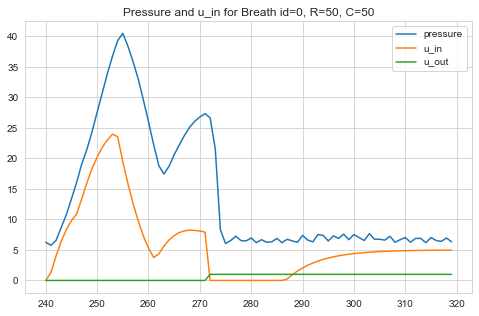

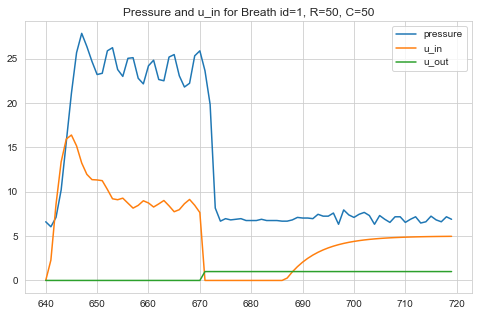

In [18]:
plot_breath(trainR50C50,0)
plot_breath(trainR50C50,1)

### R=50 and C=50 Analysis
* Pressure follows u_in curve pretty closely 
    * proportional control
    * but with a multiplier that doesn't seem consistent
* integration seems to hava a role
* so does derivative


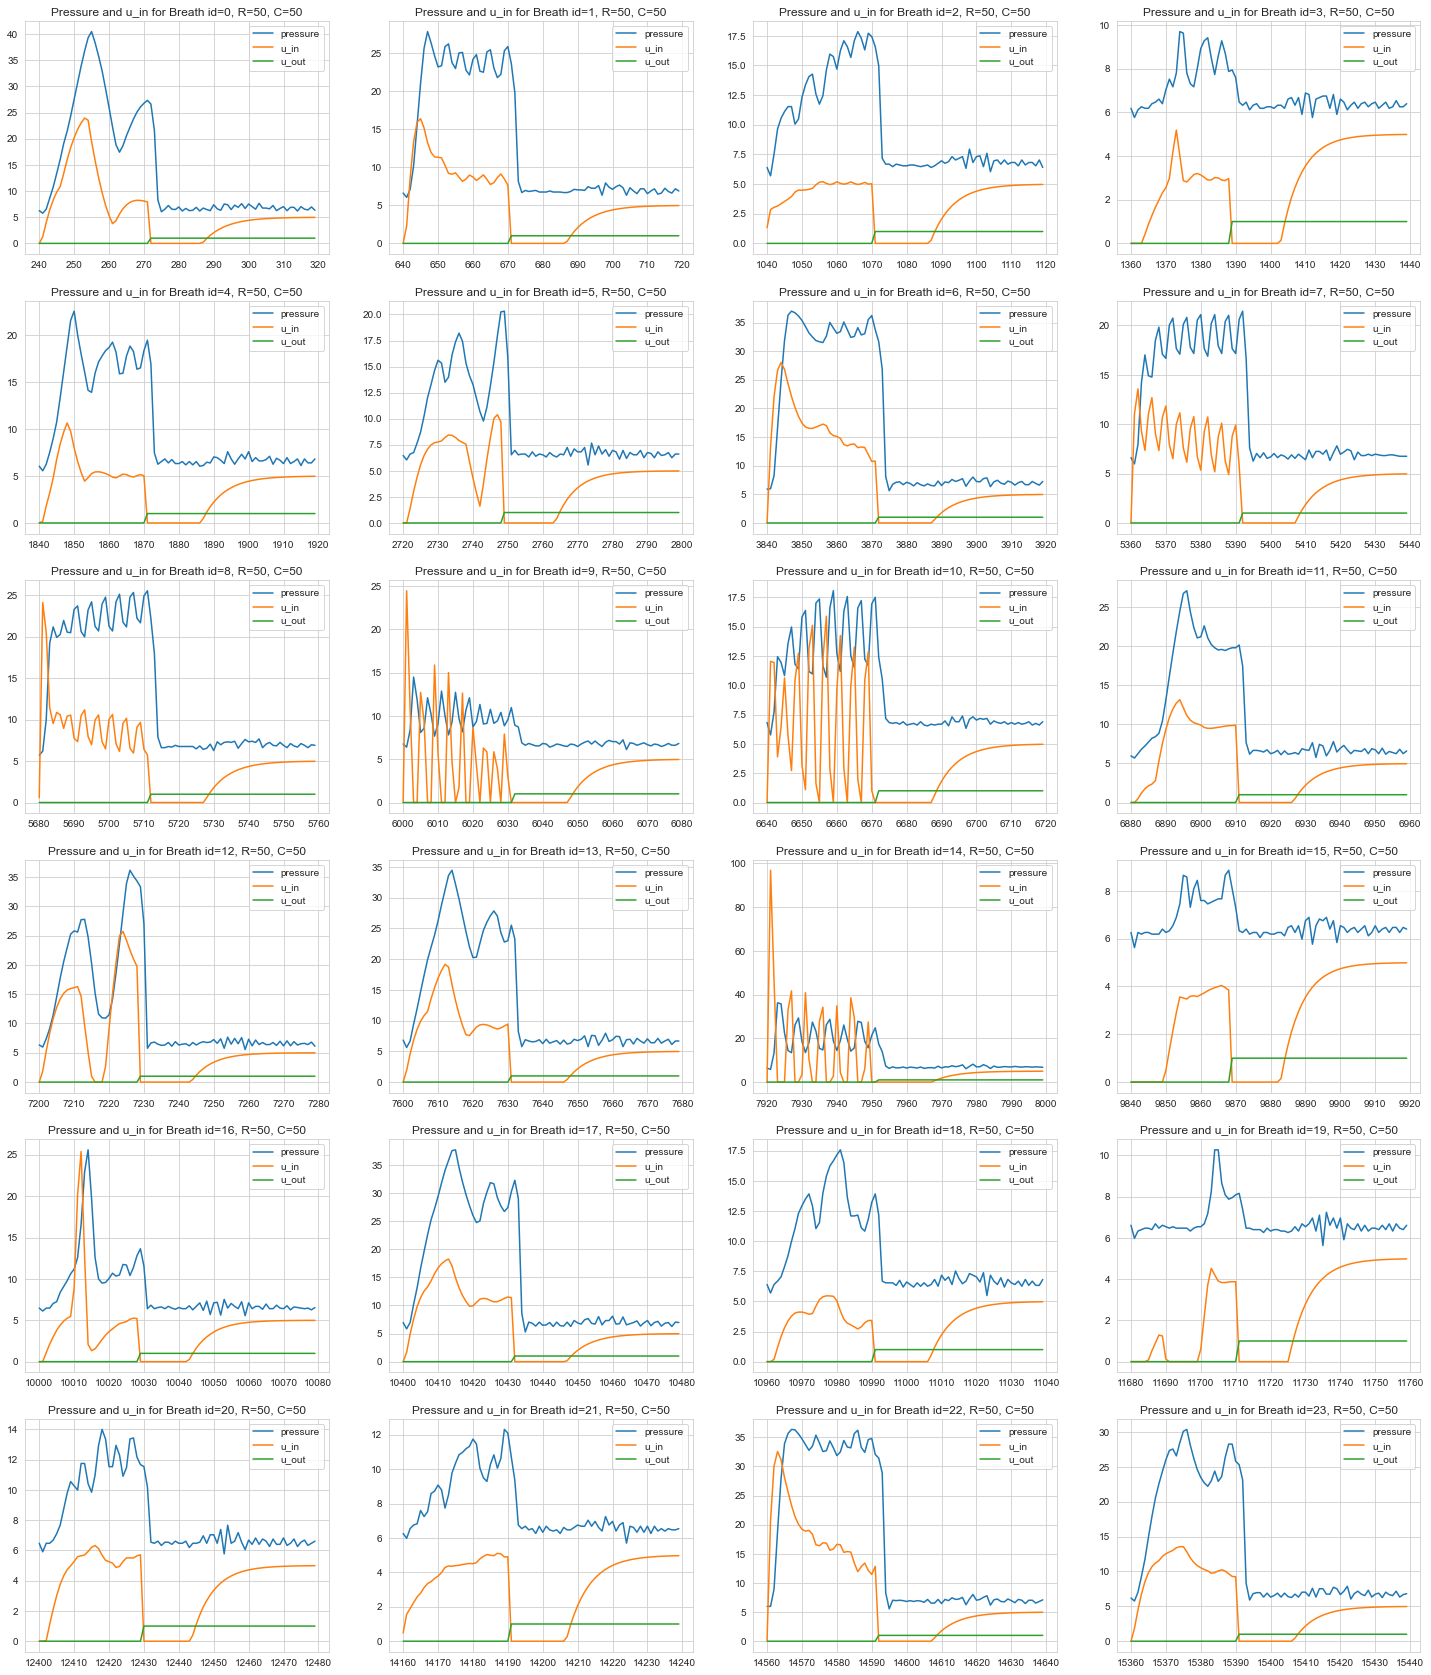

In [34]:
fig, ax = plt.subplots(6, 4, figsize=(25,30))
ax = ax.flatten()
for i in range(24):
    id1 = get_breath(trainR50C50,i)
    r = id1.R.iloc[0]
    c = id1.C.iloc[0]
    ax[i].plot(id1.pressure,label='pressure')
    ax[i].plot(id1.u_in,label='u_in')
    ax[i].plot(id1.u_out,label='u_out')
    ax[i].set_title(f'Pressure and u_in for Breath id={i}, R={r}, C={c}')
    ax[i].legend();
    
plt.savefig('R50C50_24Plots.png')

Plot integrated u_in vs. max pressure